In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageColor
import os
import csv

def calculate_text_size(text, font):
    # calculate text size based on font properties
    ascent, descent = font.getmetrics()
    text_width = font.getmask(text).getbbox()[2]
    text_height = ascent + descent
    return text_width, text_height

def get_brightness(color):
    # Calculate brightness of a color (grayscale value) for the text
    r, g, b = ImageColor.getrgb(color)
    return (r * 299 + g * 587 + b * 114) / 1000 


def visualize_image(filename, csv_filename):
        # Open image
        image_path = filename
        img = Image.open(image_path)
        draw = ImageDraw.Draw(img)

        # Read bounding box information from CSV file
        if os.path.getsize(csv_filename) > 0:
            with open(csv_filename, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                #next(csvreader)  # Skip header row
                for row in csvreader:
                    if row:
                        xmin, ymin, xmax, ymax = map(int, row[0:4])
                        class_name = row[4]
        
                        # Define colors for different classes
                        class_colors = {
                            'danger': 'yellow',
                            'interdiction': 'purple',
                            'obligation': 'blue',
                            'stop': 'magenta',
                            'ceder': 'cyan',
                            'frouge': 'red',
                            'forange': 'orange',
                            'fvert': 'green'
                        }
        
                         # Define brightness threshold for determining text color
                        brightness_threshold = 150  
        
                        # Get bounding box color
                        box_color = class_colors.get(class_name, 'white') #white is the de
        
                        # Determine text color based on brightness of box color
                        text_color = 'black' if get_brightness(box_color) > brightness_threshold else 'white'
        
                        # Draw bounding box
                        draw.rectangle([(xmin, ymin), (xmax, ymax)], outline=box_color)
        
                        # Define font and size
                        font_size = 30 # Adjust the font size here
                        font = ImageFont.truetype("arial.ttf", font_size)
        
                        # Get text size
                        text_width, text_height = calculate_text_size(class_name, font)
        
                        # Draw filled rectangle as background for class name
                        draw.rectangle([(xmin, ymin - text_height), (xmin + text_width, ymin)], fill=box_color)
        
                        # Draw class name text on top of the filled rectangle
                        draw.text((xmin, ymin - text_height), class_name, fill=text_color, font=font)
        return img

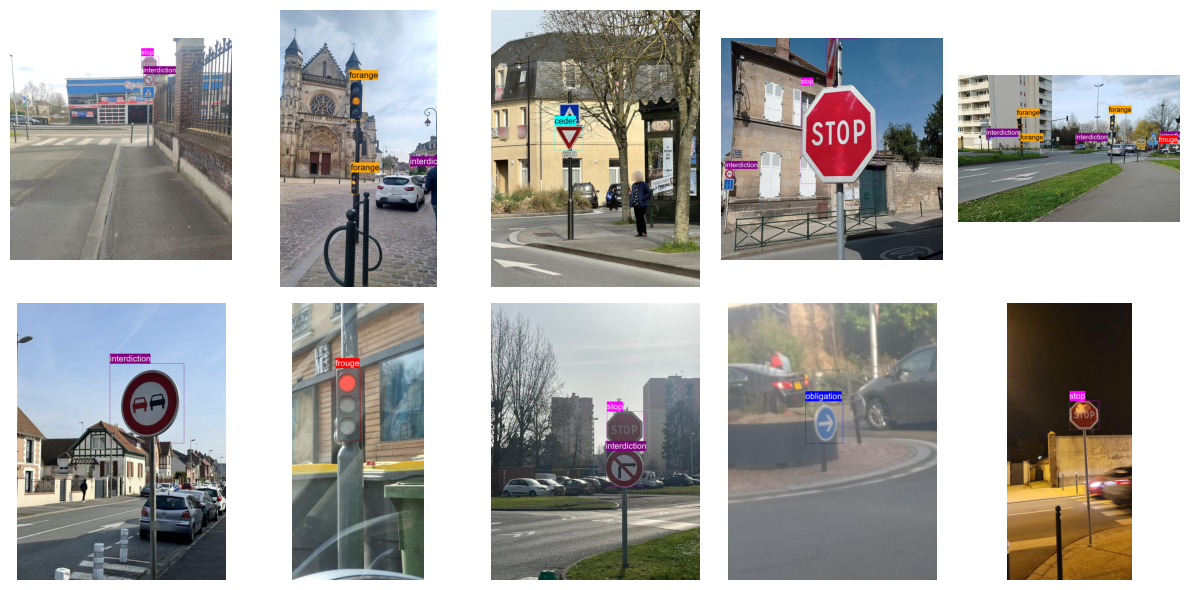

In [4]:
import os
import random
import matplotlib.pyplot as plt


# Affiche au hasard des images positives de l'ensemble d'apprentissage
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for ax in axs.ravel():
    images_dir = os.path.join("train", "images")
    labels_dir = os.path.join("train", "labels")
    image_name = random.choice(os.listdir(images_dir))
    image_path = os.path.join(images_dir, image_name)
    csv_path = os.path.join(labels_dir, image_name[:-4] + ".csv")   
    # Call visualize_image function to modify the image
    image_to_display = visualize_image(image_path, csv_path)
    
    # Display the modified image
    ax.imshow(image_to_display)
    ax.axis('off')
        
plt.tight_layout()
plt.show()


train\images\0001.jpg


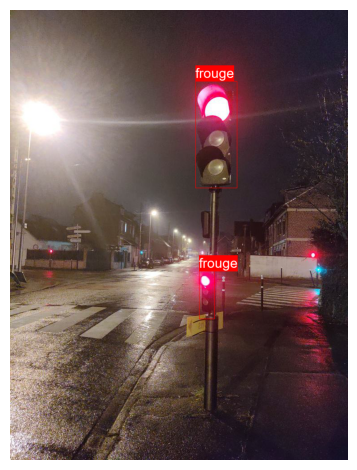

In [5]:
import os
import random
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1)

images_dir = os.path.join("train", "images")
labels_dir = os.path.join("train", "labels")
image_name = "0001.jpg"
image_path = os.path.join(images_dir, image_name)
print(image_path)
csv_path = os.path.join(labels_dir, image_name[:-4] + ".csv")   
    # Call visualize_image function to modify the image
image_to_display = visualize_image(image_path, csv_path)
    
    # Display the modified image
axs.imshow(image_to_display)
axs.axis('off')
        
plt.tight_layout()
plt.show()


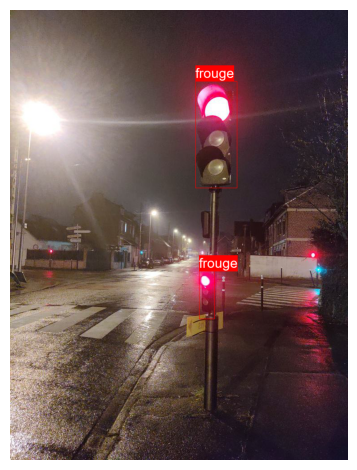

In [6]:
from PIL import Image
import numpy as np

def rotate_image_left_and_add_noise(image_path):
    # Ouvrir l'image originale
    img = Image.open(image_path)
    # Rotation de l'image de 90 degrés dans le sens antihoraire
    mirrored_img = img.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Convertir l'image en un tableau NumPy
    img_array = np.array(mirrored_img)
    
    # Générer du bruit gaussien
    mean = 0
    sigma = 10  # La variance du bruit
    gauss = np.random.normal(mean, sigma, img_array.shape).reshape(img_array.shape)
    
    # Ajouter le bruit à l'image
    noisy_img_array = img_array + gauss
    
    # S'assurer que les valeurs sont dans l'intervalle [0, 255]
    noisy_img_array = np.clip(noisy_img_array, 0, 255)
    
    # Convertir le tableau NumPy de retour en image PIL
    noisy_img = Image.fromarray(noisy_img_array.astype('uint8'))
    
    # Sauvegarder l'image avec bruit
   # noisy_img.save("train/images2/0001_bis.jpg")

    return noisy_img
    
#image_to_display = visualize_image(mirrored_img, csv_path)
fig, axs = plt.subplots(1, 1)

# Exemple d'utilisation
image_path = 'train/images/0718.jpg'
rotated_image = rotate_image_left_and_add_noise(image_path)
rotated_image.show()  # Afficher l'image tournée

#image_to_display = visualize_image("train/images2/0001_bis.jpg", "train/labels/0718.csv")
axs.imshow(image_to_display)
axs.axis('off')
        
plt.tight_layout()
plt.show()


In [7]:
import os
import csv

def compter_panneaux(images_path, labels_path):
    # Dictionnaire pour compter les panneaux
    panneaux_count = {}

    # Liste des fichiers images
    image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

    # Parcourir chaque image
    for image_file in image_files:
        # Obtenir le nom de base sans l'extension
        base_name = os.path.splitext(image_file)[0]
        
        # Chemin vers le fichier label correspondant
        label_file = os.path.join(labels_path, base_name + '.csv')
        
        # Vérifier si le fichier label existe et n'est pas vide
        if os.path.exists(label_file) and os.path.getsize(label_file) > 0:
            # Lire le fichier CSV
            with open(label_file, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                # Parcourir chaque ligne du fichier CSV
                for row in csvreader:
                    if len(row) >= 5:  # Vérifier que la ligne a au moins 5 colonnes
                        # Supposons que la classe du panneau est dans la 5ème colonne (index 4)
                        class_name = row[4]
                        if class_name in panneaux_count:
                            panneaux_count[class_name] += 1
                        else:
                            panneaux_count[class_name] = 1

    # Afficher le résultat
    for panneau, count in panneaux_count.items():
        print(f"Nombre de panneaux '{panneau}' : {count}")

# Chemin vers le dossier des images et des labels
images_path = 'train/images'
labels_path = 'train/labels'

# Appeler la fonction
compter_panneaux(images_path, labels_path)

images_path2 = 'train/images2'
labels_path2 = 'train/labels2'

# Appeler la fonction
#compter_panneaux(images_path2, labels_path2)

Nombre de panneaux 'frouge' : 90
Nombre de panneaux 'ceder' : 133
Nombre de panneaux 'interdiction' : 365
Nombre de panneaux 'fvert' : 109
Nombre de panneaux 'stop' : 100
Nombre de panneaux 'obligation' : 108
Nombre de panneaux 'danger' : 162
Nombre de panneaux 'empty' : 47
Nombre de panneaux 'forange' : 67


In [8]:
#Code pour rajouter class empty aux images sans panneaux, et pour corriger un stop mal orthographié
def add_empty_label_to_empty_csv_files(labels_path):
    # Liste des fichiers CSV dans le répertoire des labels
    csv_files = [f for f in os.listdir(labels_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        csv_path = os.path.join(labels_path, csv_file)
        # Vérifie si le fichier est vide ou n'a que des nouvelles lignes
        with open(csv_path, 'r') as file:
            content = file.read().strip()

        if content == "" or content == "empty":
            with open(csv_path, 'w', newline='') as csvfile:
                csvwriter = csv.writer(csvfile)
                # Ajoute l'entrée "empty" dans le fichier CSV vide
                csvwriter.writerow(["X", "X", "X", "X", "empty"])
        else:
            # Vérifie et corrige l'annotation "Stop"
            with open(csv_path, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                rows = list(csvreader)
                for row in rows:
                    if len(row) > 4 and row[4] == "Stop":
                        row[4] = "stop"

            # Écrit les lignes corrigées dans le fichier CSV
            with open(csv_path, 'w', newline='') as csvfile:
                csvwriter = csv.writer(csvfile)
                csvwriter.writerows(rows)

add_empty_label_to_empty_csv_files("train/labels")


In [15]:
import os
import csv
import shutil
from PIL import Image
import numpy as np

def add_noise(image):
    """ Ajouter du bruit gaussien à l'image. """
    img_array = np.array(image)
    noise = np.random.normal(loc=0.0, scale=25, size=img_array.shape)
    noisy_img_array = np.clip(img_array + noise, 0, 255)
    return Image.fromarray(noisy_img_array.astype('uint8'))

def mirror_image(image):
    """ Retourner l'image horizontalement. """
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def update_csv(original_csv, new_csv, image_width):
    with open(original_csv, 'r') as infile, open(new_csv, 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        for row in reader:
            if row:
                # Convertir les coordonnées en entiers
                x1, y1, x2, y2 = map(int, row[:-1])
                label = row[-1]
                if label !="stop" :
                    # Mettre à jour les coordonnées pour l'image transposée
                    new_x1 = image_width - x2
                    new_x2 = image_width - x1
    
                    # Écrire la nouvelle ligne dans le fichier CSV
                    writer.writerow([new_x1, y1, new_x2, y2, label])
                else :
                    continue
                    


In [16]:
def process_images(image_folder, label_folder, target_image_folder, target_label_folder, target_labels):
    target_labels_set = set(target_labels)
    # Assurer que les dossiers cibles existent
    os.makedirs(target_image_folder, exist_ok=True)
    os.makedirs(target_label_folder, exist_ok=True)

    for filename in os.listdir(image_folder):
        image_path = os.path.join(image_folder, filename)
        label_path = os.path.join(label_folder, filename.replace('.jpg', '.csv'))
        target_image_path = os.path.join(target_image_folder, filename)
        target_label_path = os.path.join(target_label_folder, filename.replace('.jpg', '.csv'))

        # Copier toutes les images et fichiers CSV dans les nouveaux dossiers
        shutil.copy(image_path, target_image_path)
        shutil.copy(label_path, target_label_path)

        # Lire et vérifier les labels
        with open(label_path, 'r') as f:
            labels = [row[-1].lower() for row in csv.reader(f)]
        labels_set = set(labels)
        
        # Vérifier si l'image contient uniquement les panneaux cibles
        if labels_set <= target_labels_set:
            img = Image.open(image_path)
            mirrored_img = mirror_image(img)
            noisy_img = add_noise(mirrored_img)
            noisy_img.save(os.path.join(target_image_folder, filename.replace('.jpg', '_bis.jpg')))
            
            new_csv_path = os.path.join(target_label_folder, filename.replace('.jpg', '_bis.csv'))
            update_csv(label_path, new_csv_path, img.width)

In [19]:
image_folder = 'train/images'
label_folder = 'train/labels'
new_image_folder = 'train/images2'
new_label_folder = 'train/labels2'
target_labels = ['frouge', 'forange', 'fvert','stop', 'obligation', 'ceder','danger']

# Exécuter le processus
process_images(image_folder, label_folder, new_image_folder, new_label_folder, target_labels)

In [20]:
import os
import csv



# Chemin vers le dossier des images et des labels
images_path2 = 'train/images2'
labels_path2 = 'train/labels2'

# Appeler la fonction
compter_panneaux(images_path2, labels_path2)

Nombre de panneaux 'frouge' : 153
Nombre de panneaux 'ceder' : 223
Nombre de panneaux 'interdiction' : 365
Nombre de panneaux 'fvert' : 170
Nombre de panneaux 'stop' : 100
Nombre de panneaux 'obligation' : 195
Nombre de panneaux 'danger' : 252
Nombre de panneaux 'empty' : 47
Nombre de panneaux 'forange' : 104


# Classification

In [21]:
import pandas as pd
from skimage import io, color
from skimage.feature import hog
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
import numpy as np
from PIL import Image
import os
import joblib

def load_images_and_labels(image_dir, label_dir):
    data = []
    labels = []
    columns = ['x1', 'y1', 'x2', 'y2', 'label']

    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_dir, filename)
            csv_path = os.path.join(label_dir, filename[:-4] + ".csv")
            
            if not os.path.exists(csv_path):
                continue

            image = io.imread(image_path)
            if len(image.shape) > 2:
                image = color.rgb2gray(image)  # Convertir en niveaux de gris pour HOG

            df = pd.read_csv(csv_path, header=None, names=columns)
            for _, row in df.iterrows():
                label = row['label'].strip()
                if label == 'ff':
                    continue  # Ignorer les labels 'ff'
                
                if label == 'empty':
                    # Diviser l'image en 9 sous-images et utiliser chaque sous-image pour les cas 'empty'
                    height, width = image.shape
                    sub_images = [
                        image[:height//3, :width//3],
                        image[:height//3, width//3:2*width//3],
                        image[:height//3, 2*width//3:],
                        image[height//3:2*height//3, :width//3],
                        image[height//3:2*height//3, 2*width//3:],
                        image[2*height//3:, :width//3],
                    ]
                    for sub_image in sub_images:
                        sub_image_resized = Image.fromarray(sub_image).resize((100, 100))
                        hog_features = hog(np.array(sub_image_resized),orientations=16, pixels_per_cell=(8, 8),
                                           cells_per_block=(2, 2), visualize=False, feature_vector=True)
                        data.append(hog_features)
                        labels.append(label)  # Utiliser le label 'empty' pour chaque sous-image
                else:
                    x1, y1, x2, y2 = int(row['x1']), int(row['y1']), int(row['x2']), int(row['y2'])
                    if x1 >= x2 or y1 >= y2 or x1 < 0 or y1 < 0 or x2 > image.shape[1] or y2 > image.shape[0]:
                        continue
                    roi = image[y1:y2, x1:x2]
                    if roi.size == 0:
                        continue
                    roi_resized = Image.fromarray(roi).resize((100, 100))  # S'assurer que le redimensionnement est correct
                    roi_array = np.array(roi_resized)
                    hog_features = hog(roi_array,orientations=16, pixels_per_cell=(8, 8),
                                           cells_per_block=(2, 2), visualize=False, feature_vector=True)
                    data.append(hog_features)
                    labels.append(label)  # Utiliser le label spécifique du panneau

    return np.array(data, dtype='float64'), np.array(labels)  # Les labels seront convertis séparément

# Chemins vers les dossiers d'images et de labels
image_dir = 'train/images2'
label_dir = 'train/labels2'

# Charger les données
features, target = load_images_and_labels(image_dir, label_dir)

# Encoder les labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Création et entraînement du SVM avec probability=True
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(features, target_encoded)  # Utiliser les labels encodés
print("Le modèle SVM a été entraîné.")

Le modèle SVM a été entraîné.


In [22]:
labels = label_encoder.classes_
print("Les labels du modèle sont :")
print(labels)

Les labels du modèle sont :
['ceder' 'danger' 'empty' 'forange' 'frouge' 'fvert' 'interdiction'
 'obligation' 'stop']


In [23]:
import pandas as pd
from skimage import io, color
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
import numpy as np
from PIL import Image
import os
import joblib

def load_image_and_label(image_path, csv_path):
    columns = ['x1', 'y1', 'x2', 'y2', 'label']
    image = io.imread(image_path)
    if len(image.shape) > 2:
        image = color.rgb2gray(image)  # Convertir en niveaux de gris pour HOG
    
    df = pd.read_csv(csv_path, header=None, names=columns)
    return image, df

# Fonction pour préparer les données
def prepare_data(image, row):
    x1, y1, x2, y2 = int(row['x1']), int(row['y1']), int(row['x2']), int(row['y2'])
    if x1 >= x2 or y1 >= y2 or x1 < 0 or y1 < 0 or x2 > image.shape[1] or y2 > image.shape[0]:
        raise ValueError("Invalid coordinates")
    roi = image[y1:y2, x1:x2]
    if roi.size == 0:
        raise ValueError("Empty region of interest")
    roi = Image.fromarray(roi).resize((100, 100))  # Redimensionner à 100x100 pixels
    roi = np.array(roi)
    hog_features = hog(roi,orientations=16, pixels_per_cell=(8, 8),
                                           cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Charger le modèle SVM et le label encoder sauvegardés
test_image_path = os.path.join('val/images', '0039.jpg')
test_csv_path = os.path.join('val/labels', '0039.csv')

# Charger l'image et les labels
test_image, test_df = load_image_and_label(test_image_path, test_csv_path)

# Prédire pour chaque panneau dans l'image
for _, row in test_df.iterrows():
    try:
        hog_features = prepare_data(test_image, row)
        prediction = clf.predict([hog_features])
        predicted_label = label_encoder.inverse_transform(prediction)[0]
        print(f"Vrai label: {row['label']}, Prédiction: {predicted_label}")
    except ValueError as e:
        print(f"Erreur avec les coordonnées {row['x1']},{row['y1']},{row['x2']},{row['y2']}: {e}")


Vrai label: ceder, Prédiction: ceder
Vrai label: obligation, Prédiction: obligation


In [24]:

def calculate_accuracy(image_dir, label_dir):
    correct_predictions = 0
    total_predictions = 0
    bad_predictions = []

    # Parcourir les images et les fichiers CSV dans le dossier de validation
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_dir, filename)
            csv_path = os.path.join(label_dir, filename[:-4] + ".csv")
            
            if not os.path.exists(csv_path):
                continue

            # Charger l'image et les labels
            test_image, test_df = load_image_and_label(image_path, csv_path)

            # Prédire pour chaque panneau dans l'image
            for _, row in test_df.iterrows():
                true_label = row['label'].strip()
                if true_label == 'ff':
                    continue  # Ignorer les panneaux 'ff'

                try:
                    hog_features = prepare_data(test_image, row)
                    prediction = clf.predict([hog_features])
                    predicted_label = label_encoder.inverse_transform(prediction)[0]
                    
                    if predicted_label == "empty":
                        continue  # Ignorer les prédictions "empty"
                    
                    if predicted_label == true_label:
                        correct_predictions += 1
                    else:
                        bad_predictions.append((filename, row['x1'], row['y1'], row['x2'], row['y2'], true_label, predicted_label))
                    
                    total_predictions += 1
                except ValueError as e:
                    continue
                    #print(f"Erreur avec les coordonnées {row['x1']},{row['y1']},{row['x2']},{row['y2']}: {e}")

    # Calculer et afficher le taux de bonnes prédictions
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    print(f"Taux de bonnes prédictions: {accuracy:.2%}")

    # Afficher les mauvaises prédictions
    print("Mauvaises prédictions :")
    for bad_pred in bad_predictions:
        print(f"Image: {bad_pred[0]}, Coordonnées: ({bad_pred[1]}, {bad_pred[2]}, {bad_pred[3]}, {bad_pred[4]}), Vrai label: {bad_pred[5]}, Prédiction: {bad_pred[6]}")

    return accuracy

# Exemple d'utilisation
val_image_dir = 'val/images'
val_label_dir = 'val/labels'
accuracy = calculate_accuracy(val_image_dir, val_label_dir)
print(f"Accuracy: {accuracy:.2%}")

Taux de bonnes prédictions: 91.20%
Mauvaises prédictions :
Image: 0054.jpg, Coordonnées: (10, 623, 38, 693), Vrai label: frouge, Prédiction: fvert
Image: 0101.jpg, Coordonnées: (320, 202, 695, 571), Vrai label: interdiction, Prédiction: obligation
Image: 0131.jpg, Coordonnées: (395, 346, 596, 530), Vrai label: interdiction, Prédiction: obligation
Image: 0137.jpg, Coordonnées: (515, 675, 545, 750), Vrai label: forange, Prédiction: fvert
Image: 0145.jpg, Coordonnées: (281, 759, 334, 884), Vrai label: frouge, Prédiction: fvert
Image: 0145.jpg, Coordonnées: (609, 615, 636, 643), Vrai label: obligation, Prédiction: interdiction
Image: 0257.jpg, Coordonnées: (478, 904, 556, 1000), Vrai label: frouge, Prédiction: interdiction
Image: 0284.jpg, Coordonnées: (158, 362, 179, 408), Vrai label: frouge, Prédiction: fvert
Image: 0444.jpg, Coordonnées: (320, 78, 510, 453), Vrai label: frouge, Prédiction: fvert
Image: 0547.jpg, Coordonnées: (891, 694, 913, 720), Vrai label: interdiction, Prédiction: ob

In [25]:
correct_predictions = 0
total_predictions = 0
val_image_dir_train = 'train/images'
val_label_dir_train = 'train/labels'
bad_predictions = []
accuracy = calculate_accuracy(val_image_dir_train, val_label_dir_train)


Taux de bonnes prédictions: 100.00%
Mauvaises prédictions :


# Detection de panneaux sur l'image

In [26]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à la taille d'entrée pour HOG
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1], step_size):
        for x in range(0, image.width - window_size[0], step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection
def detect_with_window(image, win_size, step_size, confidence_threshold, clf, label_encoder, draw):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
        # Si l'image redimensionnée est plus petite que la fenêtre, on arrête
        if resized_image.height < win_size[1] or resized_image.width < win_size[0]:
            break

        # Parcourir l'image avec la fenêtre glissante
        for (x1, y1, x2, y2) in sliding_window(resized_image, step_size, win_size):
            if x2 > resized_image.width or y2 > resized_image.height:
                continue

            # Préparer les données HOG pour la fenêtre courante
            hog_features = prepare_data(resized_image, (x1, y1, x2, y2))
            probabilities = clf.predict_proba([hog_features])[0]
            max_proba = np.max(probabilities)
            
            if max_proba >= confidence_threshold:
                prediction = np.argmax(probabilities)
                predicted_label = label_encoder.inverse_transform([prediction])[0]

                # Ignorer les prédictions avec le label 'empty'
                if predicted_label == 'empty':
                    continue

                # Stocker la prédiction et sa probabilité
                detections.append((max_proba, predicted_label, i, x1, y1, x2, y2))
                
                # Dessiner un rectangle autour de la détection
                draw.rectangle([(x1, y1), (x2, y2)], outline="red", width=2)
    
    return detections

# Fonction principale pour détecter les panneaux dans une image
def detect_signs_in_image(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(image)

    # Paramètres HOG utilisés lors de l'entraînement
    pixels_per_cell = (8, 8)
    cells_per_block = (2, 2)

    # Détection avec des rectangles 100x200
    detections_100x200 = detect_with_window(image, (100, 200), 32, confidence_threshold, clf, label_encoder, draw)

    # Détection avec des carrés 200x200
    detections_200x200 = detect_with_window(image, (200, 200), 32, confidence_threshold, clf, label_encoder, draw)

    # Combiner toutes les détections
    all_detections = detections_100x200 + detections_200x200

    # Trier les détections par probabilité décroissante
    all_detections = sorted(all_detections, key=lambda x: x[0], reverse=True)

    # Afficher les 5 meilleures prédictions pour chaque taille de fenêtre
    print("Les 5 meilleures prédictions avec des rectangles 100x200 :")
    for detection in detections_100x200[:5]:
        print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

    print("\nLes 5 meilleures prédictions avec des carrés 200x200 :")
    for detection in detections_200x200[:5]:
        print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

    # Afficher l'image avec les rectangles
    image.show()

    # Obtenir la détection avec la meilleure précision
    if all_detections:
        best_detection = all_detections[0]
        best_label = best_detection[1]
        result_phrase = f"L'image contient à priori le panneau {best_label}"
        print(result_phrase)
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."
        print(result_phrase)

    print("Détection terminée")
    return result_phrase, all_detections

# Exemple d'utilisation
# Assurez-vous que `clf` et `label_encoder` sont déjà entraînés et disponibles
# clf = <votre modèle entraîné>
# label_encoder = <votre label encoder>

image_path = 'train/images/0005.jpg'
result_phrase, detections = detect_signs_in_image(image_path, clf, label_encoder)


Les 5 meilleures prédictions avec des rectangles 100x200 :
Panneau détecté: forange, Confiance: 0.65, Échelle: 0, Position: (192, 0)
Panneau détecté: interdiction, Confiance: 0.49, Échelle: 0, Position: (256, 0)
Panneau détecté: interdiction, Confiance: 0.56, Échelle: 0, Position: (256, 32)
Panneau détecté: interdiction, Confiance: 0.48, Échelle: 0, Position: (288, 32)
Panneau détecté: frouge, Confiance: 0.96, Échelle: 0, Position: (192, 64)

Les 5 meilleures prédictions avec des carrés 200x200 :
Panneau détecté: fvert, Confiance: 0.40, Échelle: 0, Position: (32, 32)
Panneau détecté: fvert, Confiance: 0.57, Échelle: 0, Position: (32, 96)
Panneau détecté: fvert, Confiance: 0.47, Échelle: 0, Position: (224, 96)
Panneau détecté: ceder, Confiance: 0.45, Échelle: 0, Position: (128, 320)
Panneau détecté: fvert, Confiance: 0.49, Échelle: 0, Position: (96, 416)
L'image contient à priori le panneau frouge
Détection terminée


Detection avec une fenetre plus grande : 200*200

Remarque actuelle : 
Les rectangles verticaux sont performants pour détecter des feux
Les carrés sont perfermants pour détecter des panneaux normaux
Quel compromis ?

In [27]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from collections import Counter

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à la taille d'entrée pour HOG
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1], step_size):
        for x in range(0, image.width - window_size[0], step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection
def detect_with_window(image, win_size, step_size, confidence_threshold, clf, label_encoder, draw):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
        # Si l'image redimensionnée est plus petite que la fenêtre, on arrête
        if resized_image.height < win_size[1] or resized_image.width < win_size[0]:
            break

        # Parcourir l'image avec la fenêtre glissante
        for (x1, y1, x2, y2) in sliding_window(resized_image, step_size, win_size):
            if x2 > resized_image.width or y2 > resized_image.height:
                continue

            # Préparer les données HOG pour la fenêtre courante
            hog_features = prepare_data(resized_image, (x1, y1, x2, y2))
            probabilities = clf.predict_proba([hog_features])[0]
            max_proba = np.max(probabilities)
            
            if max_proba >= confidence_threshold:
                prediction = np.argmax(probabilities)
                predicted_label = label_encoder.inverse_transform([prediction])[0]

                # Ignorer les prédictions avec le label 'empty'
                if predicted_label == 'empty':
                    continue

                # Ajuster les coordonnées à l'échelle originale
                scale_factor = 1.5 ** i
                original_x1 = int(x1 * scale_factor)
                original_y1 = int(y1 * scale_factor)
                original_x2 = int(x2 * scale_factor)
                original_y2 = int(y2 * scale_factor)

                # Stocker la prédiction et sa probabilité
                detections.append((max_proba, predicted_label, i, original_x1, original_y1, original_x2, original_y2))
                
                # Dessiner un rectangle autour de la détection
                draw.rectangle([(original_x1, original_y1), (original_x2, original_y2)], outline="red", width=2)
    
    return detections

# Fonction principale pour détecter les panneaux dans une image
def detect_signs_in_image(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(image)

    # Détection avec des rectangles 100x200
    detections_100x200 = detect_with_window(image, (100, 200), 32, confidence_threshold, clf, label_encoder, draw)

    # Détection avec des carrés 200x200
    detections_200x200 = detect_with_window(image, (200, 200), 32, confidence_threshold, clf, label_encoder, draw)

    # Détection avec des rectangles 50x100
    detections_50x100 = detect_with_window(image, (50, 100), 32, confidence_threshold, clf, label_encoder, draw)

    # Combiner toutes les détections
    all_detections = detections_100x200 + detections_200x200 + detections_50x100

    # Trier les détections par probabilité décroissante
    all_detections = sorted(all_detections, key=lambda x: x[0], reverse=True)

    # Afficher les 5 meilleures prédictions pour chaque taille de fenêtre
    print("Les 5 meilleures prédictions avec des rectangles 100x200 :")
    for detection in detections_100x200[:5]:
        print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

    print("\nLes 5 meilleures prédictions avec des carrés 200x200 :")
    for detection in detections_200x200[:5]:
        print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

    print("\nLes 5 meilleures prédictions avec des rectangles 50x100 :")
    for detection in detections_50x100[:5]:
        print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

    # Afficher l'image avec les rectangles
    image.show()

    # Obtenir la détection avec la meilleure précision
    if all_detections:
        best_detection = all_detections[0]
        best_label = best_detection[1]
        
        # Obtenir la détection qui apparait le plus de fois
        labels = [detection[1] for detection in all_detections]
        most_common_label, most_common_count = Counter(labels).most_common(1)[0]
        
        result_phrase = (f"L'image contient à priori le panneau {best_label} "
                         f"avec la plus grande confiance ({best_detection[0]:.2f}). "
                         f"Le panneau le plus fréquemment détecté est {most_common_label} "
                         f"apparu {most_common_count} fois.")
        print(result_phrase)
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."
        print(result_phrase)

    print("Détection terminée")
    return result_phrase, all_detections

# Exemple d'utilisation
# Assurez-vous que `clf` et `label_encoder` sont déjà entraînés et disponibles
# clf = <votre modèle entraîné>
# label_encoder = <votre label encoder>

image_path = 'train/images/0001.jpg'
result_phrase, detections = detect_signs_in_image(image_path, clf, label_encoder)


Les 5 meilleures prédictions avec des rectangles 100x200 :
Panneau détecté: fvert, Confiance: 0.48, Échelle: 0, Position: (160, 0)
Panneau détecté: fvert, Confiance: 0.41, Échelle: 0, Position: (416, 64)
Panneau détecté: fvert, Confiance: 0.42, Échelle: 0, Position: (128, 128)
Panneau détecté: fvert, Confiance: 0.55, Échelle: 0, Position: (416, 128)
Panneau détecté: fvert, Confiance: 0.51, Échelle: 0, Position: (64, 160)

Les 5 meilleures prédictions avec des carrés 200x200 :
Panneau détecté: forange, Confiance: 0.50, Échelle: 0, Position: (256, 64)
Panneau détecté: fvert, Confiance: 0.72, Échelle: 0, Position: (352, 64)
Panneau détecté: fvert, Confiance: 0.45, Échelle: 0, Position: (384, 64)
Panneau détecté: forange, Confiance: 0.71, Échelle: 0, Position: (352, 128)
Panneau détecté: frouge, Confiance: 0.44, Échelle: 0, Position: (512, 160)

Les 5 meilleures prédictions avec des rectangles 50x100 :
Panneau détecté: frouge, Confiance: 0.49, Échelle: 0, Position: (352, 32)
Panneau détect

In [ ]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from collections import Counter
from joblib import Parallel, delayed

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à la taille d'entrée pour HOG
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1], step_size):
        for x in range(0, image.width - window_size[0], step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection pour une seule fenêtre
def detect_single_window(image, box, clf, label_encoder, confidence_threshold):
    hog_features = prepare_data(image, box)
    probabilities = clf.predict_proba([hog_features])[0]
    max_proba = np.max(probabilities)
    if max_proba >= confidence_threshold:
        prediction = np.argmax(probabilities)
        predicted_label = label_encoder.inverse_transform([prediction])[0]
        if predicted_label != 'empty':
            return max_proba, predicted_label, box
    return None

# Fonction de détection
def detect_with_window(image, win_size, step_size, confidence_threshold, clf, label_encoder, draw):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
        # Si l'image redimensionnée est plus petite que la fenêtre, on arrête
        if resized_image.height < win_size[1] or resized_image.width < win_size[0]:
            break

        # Parcourir l'image avec la fenêtre glissante
        boxes = list(sliding_window(resized_image, step_size, win_size))
        results = Parallel(n_jobs=-1)(delayed(detect_single_window)(resized_image, box, clf, label_encoder, confidence_threshold) for box in boxes)
        results = [r for r in results if r is not None]

        for max_proba, predicted_label, (x1, y1, x2, y2) in results:
            # Ajuster les coordonnées à l'échelle originale
            scale_factor = 1.5 ** i
            original_x1 = int(x1 * scale_factor)
            original_y1 = int(y1 * scale_factor)
            original_x2 = int(x2 * scale_factor)
            original_y2 = int(y2 * scale_factor)

            # Stocker la prédiction et sa probabilité
            detections.append((max_proba, predicted_label, i, original_x1, original_y1, original_x2, original_y2))
                
            # Dessiner un rectangle autour de la détection
            draw.rectangle([(original_x1, original_y1), (original_x2, original_y2)], outline="red", width=2)
    
    return detections

# Fonction principale pour détecter les panneaux dans une image
def detect_signs_in_image(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(image)

    # Détection avec des rectangles 100x200
    detections_100x200 = detect_with_window(image, (100, 200), 32, confidence_threshold, clf, label_encoder, draw)

    # Détection avec des carrés 200x200
    detections_200x200 = detect_with_window(image, (200, 200), 32, confidence_threshold, clf, label_encoder, draw)

    # Détection avec des rectangles 50x100
    detections_50x100 = detect_with_window(image, (50, 100), 32, confidence_threshold, clf, label_encoder, draw)

    # Combiner toutes les détections
    all_detections = detections_100x200 + detections_200x200 + detections_50x100

    # Trier les détections par probabilité décroissante
    all_detections = sorted(all_detections, key=lambda x: x[0], reverse=True)

    # Afficher les 5 meilleures prédictions pour chaque taille de fenêtre
    print("Les 5 meilleures prédictions avec des rectangles 100x200 :")
    for detection in detections_100x200[:5]:
        print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

    print("\nLes 5 meilleures prédictions avec des carrés 200x200 :")
    for detection in detections_200x200[:5]:
        print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

    print("\nLes 5 meilleures prédictions avec des rectangles 50x100 :")
    for detection in detections_50x100[:5]:
        print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

    # Afficher l'image avec les rectangles
    image.show()

    # Obtenir la détection avec la meilleure précision
    if all_detections:
        best_detection = all_detections[0]
        best_label = best_detection[1]
        
        # Obtenir la détection qui apparait le plus de fois
        labels = [detection[1] for detection in all_detections]
        most_common_label, most_common_count = Counter(labels).most_common(1)[0]
        
        result_phrase = (f"L'image contient à priori le panneau {best_label} "
                         f"avec la plus grande confiance ({best_detection[0]:.2f}). "
                         f"Le panneau le plus fréquemment détecté est {most_common_label} "
                         f"apparu {most_common_count} fois.")
        print(result_phrase)
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."
        print(result_phrase)

    print("Détection terminée")
    return result_phrase, all_detections

# Exemple d'utilisation
# Assurez-vous que `clf` et `label_encoder` sont déjà entraînés et disponibles
# clf = <votre modèle entraîné>
# label_encoder = <votre label encoder>

image_path = 'train/images/0195.jpg'
result_phrase, detections = detect_signs_in_image(image_path, clf, label_encoder)


In [ ]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from collections import Counter
from joblib import Parallel, delayed

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à la taille d'entrée pour HOG
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1], step_size):
        for x in range(0, image.width - window_size[0], step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection pour une seule fenêtre
def detect_single_window(image, box, clf, label_encoder, confidence_threshold):
    hog_features = prepare_data(image, box)
    probabilities = clf.predict_proba([hog_features])[0]
    max_proba = np.max(probabilities)
    if max_proba >= confidence_threshold:
        prediction = np.argmax(probabilities)
        predicted_label = label_encoder.inverse_transform([prediction])[0]
        if predicted_label != 'empty':
            return max_proba, predicted_label, box
    return None

# Fonction de détection
def detect_with_window(image, win_size, step_size, confidence_threshold, clf, label_encoder, draw):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
        # Si l'image redimensionnée est plus petite que la fenêtre, on arrête
        if resized_image.height < win_size[1] or resized_image.width < win_size[0]:
            break

        # Parcourir l'image avec la fenêtre glissante
        boxes = list(sliding_window(resized_image, step_size, win_size))
        results = Parallel(n_jobs=-1)(delayed(detect_single_window)(resized_image, box, clf, label_encoder, confidence_threshold) for box in boxes)
        results = [r for r in results if r is not None]

        for max_proba, predicted_label, (x1, y1, x2, y2) in results:
            # Ajuster les coordonnées à l'échelle originale
            scale_factor = 1.5 ** i
            original_x1 = int(x1 * scale_factor)
            original_y1 = int(y1 * scale_factor)
            original_x2 = int(x2 * scale_factor)
            original_y2 = int(y2 * scale_factor)

            # Stocker la prédiction et sa probabilité
            detections.append((max_proba, predicted_label, i, original_x1, original_y1, original_x2, original_y2))
                
            # Dessiner un rectangle autour de la détection
            draw.rectangle([(original_x1, original_y1), (original_x2, original_y2)], outline="red", width=2)
    
    return detections

# Vérifie si deux rectangles sont suffisamment éloignés
def are_rectangles_far_enough(rect1, rect2, min_distance=50):
    x1, y1, x2, y2 = rect1
    a1, b1, a2, b2 = rect2
    center1 = ((x1 + x2) / 2, (y1 + y2) / 2)
    center2 = ((a1 + a2) / 2, (b1 + b2) / 2)
    distance = np.sqrt((center1[0] - center2[0]) ** 2 + (center1[1] - center2[1]) ** 2)
    return distance > min_distance

# Fonction principale pour détecter les panneaux dans une image
def detect_signs_in_image(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(image)

    # Détection avec des rectangles 100x200
    detections_100x200 = detect_with_window(image, (100, 200), 32, confidence_threshold, clf, label_encoder, draw)

    # Détection avec des carrés 200x200
    detections_200x200 = detect_with_window(image, (200, 200), 32, confidence_threshold, clf, label_encoder, draw)

    # Détection avec des rectangles 50x100
    detections_50x100 = detect_with_window(image, (50, 100), 32, confidence_threshold, clf, label_encoder, draw)

    # Combiner toutes les détections
    all_detections = detections_100x200 + detections_200x200 + detections_50x100

    # Trier les détections par probabilité décroissante
    all_detections = sorted(all_detections, key=lambda x: x[0], reverse=True)

    # Filtrer les détections conflictuelles
    filtered_detections = []
    seen_labels = set()
    for detection in all_detections:
        if detection[1] in ['feu_rouge', 'feu_orange', 'feu_vert']:
            if 'feu_vert' in seen_labels:
                if detection[1] != 'feu_vert':
                    continue
            if 'feu_rouge' in seen_labels or 'feu_orange' in seen_labels:
                if detection[1] == 'feu_vert':
                    continue
        filtered_detections.append(detection)
        seen_labels.add(detection[1])

    # Afficher les 5 meilleures prédictions pour chaque taille de fenêtre
    print("Les 5 meilleures prédictions avec des rectangles 100x200 :")
    for detection in detections_100x200[:5]:
        print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

    print("\nLes 5 meilleures prédictions avec des carrés 200x200 :")
    for detection in detections_200x200[:5]:
        print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

    print("\nLes 5 meilleures prédictions avec des rectangles 50x100 :")
    for detection in detections_50x100[:5]:
        print(f"Panneau détecté: {detection[1]}, Confiance: {detection[0]:.2f}, Échelle: {detection[2]}, Position: ({detection[3]}, {detection[4]})")

    # Afficher l'image avec les rectangles
    image.show()

    # Obtenir la détection avec la meilleure précision
    result_phrase = ""
    if filtered_detections:
        best_detection = filtered_detections[0]
        best_label = best_detection[1]

        # Trouver la deuxième meilleure détection si sa précision est suffisante
        second_best_detection = None
        for detection in filtered_detections[1:]:
            if detection[0] >= 0.7 and detection[1] != best_label:
                second_best_detection = detection
                break
            if detection[1] == best_label and are_rectangles_far_enough(best_detection[3:], detection[3:]):
                second_best_detection = detection
                break
        
        # Compter les occurrences de chaque label
        labels = [detection[1] for detection in filtered_detections]
        most_common_label, most_common_count = Counter(labels).most_common(1)[0]

        result_phrase = (f"L'image contient à priori le panneau {best_label} "
                         f"avec la plus grande confiance ({best_detection[0]:.2f}). ")
        if second_best_detection:
            second_best_label = second_best_detection[1]
            result_phrase += f"Le deuxième panneau détecté est {second_best_label} avec une confiance de {second_best_detection[0]:.2f}. "
        result_phrase += f"Le panneau le plus fréquemment détecté est {most_common_label} apparu {most_common_count} fois."

        print(result_phrase)
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."
        print(result_phrase)

    print("Détection terminée")
    return result_phrase, filtered_detections

# Exemple d'utilisation
# Assurez-vous que `clf` et `label_encoder` sont déjà entraînés et disponibles
# clf = <votre modèle entraîné>
# label_encoder = <votre label encoder>

image_path = 'train/images/0008.jpg'
result_phrase, detections = detect_signs_in_image(image_path, clf, label_encoder)


A faire : 
Détection de plusieurs panneaux 
Une image peut uniquement contenir un type de feu
Faire translater les carrés poru qu'il recouvre toute l'image

# Technique Ines

In [54]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from collections import defaultdict
from joblib import Parallel, delayed

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à 100x100 pour correspondre au modèle entraîné
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1] + 1, step_size):
        for x in range(0, image.width - window_size[0] + 1, step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection pour une seule fenêtre
def detect_single_window(image, box, clf, label_encoder, confidence_threshold):
    hog_features = prepare_data(image, box)
    probabilities = clf.predict_proba([hog_features])[0]
    max_proba = np.max(probabilities)
    if max_proba >= confidence_threshold:
        prediction = np.argmax(probabilities)
        predicted_label = label_encoder.inverse_transform([prediction])[0]
        if predicted_label != 'empty':
            return max_proba, predicted_label, box
    return None

# Fonction de détection avec une fenêtre de taille fixe
def detect_with_fixed_window(image, win_size, step_size, confidence_threshold, clf, label_encoder):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5, max_layer=4)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
        print(f"Taille de l'image à l'échelle {1.5 ** i}: {resized_image.width}x{resized_image.height}")
        # Parcourir l'image avec la fenêtre glissante
        boxes = list(sliding_window(resized_image, step_size, win_size))
        results = Parallel(n_jobs=-1)(delayed(detect_single_window)(resized_image, box, clf, label_encoder, confidence_threshold) for box in boxes)
        results = [r for r in results if r is not None]

        for max_proba, predicted_label, (x1, y1, x2, y2) in results:
            # Ajuster les coordonnées à l'échelle originale
            scale_factor = 1.5 ** i
            original_x1 = int(x1 * scale_factor)
            original_y1 = int(y1 * scale_factor)
            original_x2 = int(x2 * scale_factor)
            original_y2 = int(y2 * scale_factor)

            # Stocker la détection
            detections.append((max_proba, predicted_label, original_x1, original_y1, original_x2, original_y2))
    
    return detections
def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si une boîte englobante en englobe une autre
def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si deux boîtes englobantes sont trop proches
def are_boxes_too_close(box1, box2, threshold=10):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return abs(x1_1 - x1_2) < threshold and abs(y1_1 - y1_2) < threshold and \
           abs(x2_1 - x2_2) < threshold and abs(y2_1 - y2_2) < threshold

# Fonction principale pour détecter les panneaux dans une image
def detect_signs_in_image(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')

    # Détection avec des carrés 64x64
    detections_64x64 = detect_with_fixed_window(image, (64, 64), 64, confidence_threshold, clf, label_encoder)

    # Stocker les résultats
    bboxes = []
    bboxes_confidences = defaultdict(list)

    for max_proba, predicted_label, x1, y1, x2, y2 in detections_64x64:
        bboxes.append(((x1, y1, x2, y2), predicted_label))
        bboxes_confidences[(x1, y1, x2, y2)].append(max_proba)
    
    # Filtrer les détections avec une confiance supérieure à 65%
    filtered_bboxes = [(bbox, label) for bbox, label in bboxes if max(bboxes_confidences[bbox]) >= 0.65]

    # Filtrer les détections conflictuelles pour les feux de signalisation
    traffic_light_detections = []
    final_bboxes = []
    for bbox, label in filtered_bboxes:
        if label in ['frouge', 'forange', 'fvert']:
            traffic_light_detections.append((bbox, label, max(bboxes_confidences[bbox])))
        else:
            final_bboxes.append((bbox, label))

    if traffic_light_detections:
        # Trouver le type de feu de signalisation avec la plus grande confiance
        best_traffic_light_type = max(traffic_light_detections, key=lambda x: x[2])[1]
        # Conserver seulement les détections de ce type
        filtered_traffic_lights = [detection for detection in traffic_light_detections if detection[1] == best_traffic_light_type]
        for bbox, label, confidence in filtered_traffic_lights:
            final_bboxes.append((bbox, label))

    # Éliminer les boîtes englobantes trop proches ou englobées
    final_bboxes_filtered = []

    for bbox, label in final_bboxes:
        if not any(does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox) for existing_bbox, existing_label in final_bboxes_filtered if existing_label == label):
            final_bboxes_filtered.append((bbox, label))
        else:
            # Trouver et comparer les confiances
            for i, (existing_bbox, existing_label) in enumerate(final_bboxes_filtered):
                if existing_label == label and (does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox)):
                    if max(bboxes_confidences[bbox]) > max(bboxes_confidences[existing_bbox]):
                        final_bboxes_filtered[i] = (bbox, label)
                    break
    
    final_bboxes = final_bboxes_filtered

    # Trouver la boîte avec la plus grande valeur de prédiction
    if final_bboxes:
        best_bbox = max(bboxes_confidences.items(), key=lambda item: max(item[1]))
        best_label = [label for bbox, label in final_bboxes if bbox == best_bbox[0]][0]
        result_phrase = f"L'image contient à priori le panneau {best_label} avec la plus grande valeur de confiance ({max(best_bbox[1]):.2f})."
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."

    predicted_signs = list(set([label for _, label in final_bboxes]))

    print(result_phrase)
    return predicted_signs, final_bboxes, bboxes_confidences, result_phrase

# Fonction pour générer des phrases de résultat
def generate_result_phrases(final_bboxes, bboxes_confidences):
    result_phrases = []
    for bbox, label in final_bboxes:
        confidences = bboxes_confidences[bbox]
        max_confidence = max(confidences)
        phrase = f"Bounding Box: {bbox}, Label: {label}, Confiance: {max_confidence:.2f}"
        result_phrases.append(phrase)
    return result_phrases

# Exemple d'utilisation
# Assurez-vous que `clf` et `label_encoder` sont déjà entraînés et disponibles
# clf = <votre modèle entraîné>
# label_encoder = <votre label encoder>

image_path = 'train/images/0317.jpg'
predicted_signs, final_bboxes, bboxes_confidences, result_phrase = detect_signs_in_image(image_path, clf, label_encoder)

# Affichage des résultats
result_phrases = generate_result_phrases(final_bboxes, bboxes_confidences)
for phrase in result_phrases:
    print(phrase)


Taille de l'image à l'échelle 1.0: 750x1000
Taille de l'image à l'échelle 1.5: 500x667
Taille de l'image à l'échelle 2.25: 334x445
Taille de l'image à l'échelle 3.375: 223x297
Taille de l'image à l'échelle 5.0625: 149x198
L'image contient à priori le panneau danger avec la plus grande valeur de confiance (0.99).
Bounding Box: (432, 216, 648, 432), Label: danger, Confiance: 0.99
Bounding Box: (448, 384, 512, 448), Label: interdiction, Confiance: 0.74
Bounding Box: (480, 288, 576, 384), Label: danger, Confiance: 0.95
Bounding Box: (576, 576, 720, 720), Label: danger, Confiance: 0.83
Bounding Box: (192, 576, 288, 672), Label: frouge, Confiance: 0.81
Bounding Box: (288, 576, 384, 672), Label: frouge, Confiance: 0.73


In [55]:
# Fonction pour afficher les carrés avec leur label sur l'image
def draw_detections(image_path, final_bboxes):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(image)
    
    # Couleurs pour différents labels
    colors = {
        'frouge': 'red',
        'forange': 'orange',
        'fvert': 'green',
        'empty': 'grey'
    }

    # Dessiner les détections sur l'image
    for bbox, label in final_bboxes:
        (x1, y1, x2, y2) = bbox
        color = colors.get(label, 'blue')  # Couleur par défaut
        draw.rectangle([x1, y1, x2, y2], outline=color, width=2)
        text_position = (x1, y1 - 10 if y1 - 10 > 10 else y1 + 10)  # Positionner le texte juste au-dessus de la boîte
        draw.text(text_position, label, fill=color)
    
    # Afficher l'image
    image.show()

# Exemple d'utilisation
draw_detections(image_path, final_bboxes)


## Suite :
Essayer de fusionner avec la méthode de détections des formes
Mettre à jour le rapport
Tester sur le dataset val

In [33]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage import measure
from skimage.draw import polygon_perimeter
from joblib import Parallel, delayed

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à la taille d'entrée pour HOG
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour détecter les contours et les formes géométriques
def detect_shapes(image):
    gray = rgb2gray(image)
    blurred = gaussian(gray, sigma=1)
    thresh = blurred > 0.5
    labeled = measure.label(thresh)
    regions = measure.regionprops(labeled)

    shapes = []
    for region in regions:
        minr, minc, maxr, maxc = region.bbox
        width = maxc - minc
        height = maxr - minr
        area = region.area
        perimeter = region.perimeter

        if perimeter == 0:
            continue

        # Calculer la circularité pour détecter les cercles
        circularity = 4 * np.pi * (area / (perimeter * perimeter))

        if width > 20 and height > 20:  # Filtrer les petites régions bruitées
            if 0.8 <= circularity <= 1.2:
                shape = "circle"
            elif abs(width - height) < 10:
                shape = "rectangle"  # Approximativement carré
            elif width > 1.2 * height or height > 1.2 * width:
                shape = "rectangle"
            else:
                # Détection de triangle par approximation du polygone
                coords = region.coords
                approx = measure.approximate_polygon(coords, tolerance=2.5)
                if len(approx) == 4:
                    shape = "triangle"
                else:
                    shape = "unidentified"
            shapes.append((shape, (minc, minr, maxc, maxr)))

    return shapes

# Fonction principale pour détecter les panneaux dans une image
def detect_signs_in_image(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')
    image_array = np.array(image)
    draw = ImageDraw.Draw(image)

    # Détection des formes géométriques
    shapes = detect_shapes(image_array)

    # Liste pour stocker les détections finales
    all_detections = []

    for (shape, bbox) in shapes:
        x1, y1, x2, y2 = bbox
        box = (x1, y1, x2, y2)
        hog_features = prepare_data(image, box)
        probabilities = clf.predict_proba([hog_features])[0]
        max_proba = np.max(probabilities)

        if max_proba >= confidence_threshold:
            prediction = np.argmax(probabilities)
            predicted_label = label_encoder.inverse_transform([prediction])[0]
            all_detections.append((max_proba, predicted_label, x1, y1, x2, y2))
            draw.rectangle([(x1, y1), (x2, y2)], outline="red", width=2)

    # Afficher les détections sur l'image
    image.show()

    # Préparer les résultats avec les pourcentages de confiance les plus élevés
    detections_summary = {}
    for detection in all_detections:
        proba, label, x1, y1, x2, y2 = detection
        if label not in detections_summary or proba > detections_summary[label]:
            detections_summary[label] = proba

    # Trier les détections par confiance décroissante
    sorted_detections = sorted(detections_summary.items(), key=lambda x: x[1], reverse=True)

    # Afficher le panneau avec le pourcentage le plus élevé (en ignorant 'empty' si c'est le plus probable)
    if sorted_detections:
        best_label, best_proba = sorted_detections[0]
        if best_label == 'empty' and len(sorted_detections) > 1:
            best_label, best_proba = sorted_detections[1]
        result_phrase = f"Cette image contient à priori ce panneau : {best_label} à {best_proba * 100:.2f}%"
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."

    print(result_phrase)
    print("Détails des détections :")
    for label, proba in sorted_detections:
        print(f"{label} à {proba * 100:.2f}%")

    print("Détection terminée")
    return result_phrase, all_detections



image_path = 'train/images/0005.jpg'
result_phrase, detections = detect_signs_in_image(image_path, clf, label_encoder)


Cette image contient à priori ce panneau : frouge à 61.81%
Détails des détections :
empty à 98.70%
frouge à 61.81%
fvert à 50.43%
Détection terminée


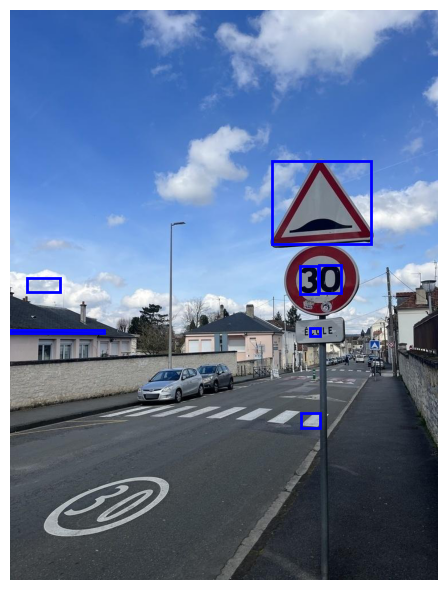

Cette image contient à priori ce panneau : danger à 99.62%
Détails des détections :
danger à 99.62%
interdiction à 99.62%
fvert à 65.46%
Détection terminée
Panneau: danger, Confiance: 99.62%, Coordonnées: (460, 265), (633, 410)
Panneau: interdiction, Confiance: 99.62%, Coordonnées: (542, 447), (580, 496)


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, measure, filters, morphology, feature
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from PIL import Image, ImageDraw
import joblib

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à la taille d'entrée pour HOG
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour vérifier si une boîte est complètement contenue dans une autre
def is_contained(inner_box, outer_box):
    ix1, iy1, ix2, iy2 = inner_box
    ox1, oy1, ox2, oy2 = outer_box
    return ix1 >= ox1 and iy1 >= oy1 and ix2 <= ox2 and iy2 <= oy2

# Fonction principale pour détecter les formes et les panneaux dans une image
def detect_and_display_shapes(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = io.imread(image_path)
    image_pil = Image.fromarray(image)
    image_gray = color.rgb2gray(image)

    # Appliquer un seuillage pour binariser l'image
    thresh = filters.threshold_otsu(image_gray)
    bw = morphology.closing(image_gray > thresh, morphology.square(3))

    # Enlever les objets connectés au bord de l'image
    cleared = morphology.remove_small_objects(bw, 20)
    cleared = morphology.remove_small_holes(cleared, 20)

    # Utiliser la détection de contours pour améliorer la détection des formes
    edges = feature.canny(image_gray, sigma=2.0)
    filled_edges = morphology.binary_closing(edges, morphology.square(3))
    label_image = measure.label(filled_edges)

    # Détecter les propriétés des régions
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image)

    all_detections = []

    for region in measure.regionprops(label_image):
        # Sauter les petites régions
        if region.area < 100:
            continue

        # Détecter la boîte englobante
        minr, minc, maxr, maxc = region.bbox
        rect_height = maxr - minr
        rect_width = maxc - minc

        # Préparer les données pour la classification
        box = (minc, minr, maxc, maxr)
        hog_features = prepare_data(image_pil, box)
        probabilities = clf.predict_proba([hog_features])[0]
        max_proba = np.max(probabilities)

        if max_proba >= confidence_threshold:
            prediction = np.argmax(probabilities)
            predicted_label = label_encoder.inverse_transform([prediction])[0]
            if predicted_label != 'empty':
                all_detections.append((max_proba, predicted_label, minc, minr, maxc, maxr))

    # Filtrer les boîtes englobantes qui sont complètement contenues dans d'autres
    filtered_detections = []
    for i, det1 in enumerate(all_detections):
        contained = False
        for j, det2 in enumerate(all_detections):
            if i != j and is_contained(det1[2:], det2[2:]):
                contained = True
                if det1[0] > det2[0]:  # Si la boîte intérieure a une meilleure précision, remplacer
                    if det2 in filtered_detections:
                        filtered_detections.remove(det2)
                    filtered_detections.append(det1)
                break
        if not contained:
            filtered_detections.append(det1)

    # Sélectionner une seule boîte parmi les boîtes proches
    selected_detections = []
    while filtered_detections:
        det = filtered_detections.pop(0)
        proba, label, minc, minr, maxc, maxr = det
        close_detections = [d for d in filtered_detections if (abs(d[2] - minc) < 20 and abs(d[3] - minr) < 20) or (abs(d[4] - maxc) < 20 and abs(d[5] - maxr) < 20)]
        for close_det in close_detections:
            if close_det in filtered_detections:
                filtered_detections.remove(close_det)
            if close_det[0] > proba:
                det = close_det
        selected_detections.append(det)

    for detection in selected_detections:
        proba, label, minc, minr, maxc, maxr = detection
        rect_color = 'red' if label == 'circle' else ('green' if label == 'rectangle' else 'blue')
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, edgecolor=rect_color, facecolor='none', linewidth=2)
        ax.add_patch(rect)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

    # Préparer les résultats avec les pourcentages de confiance les plus élevés
    detections_summary = {}
    for detection in selected_detections:
        proba, label, x1, y1, x2, y2 = detection
        if label not in detections_summary or proba > detections_summary[label]:
            detections_summary[label] = proba

    # Trier les détections par confiance décroissante
    sorted_detections = sorted(detections_summary.items(), key=lambda x: x[1], reverse=True)

    # Afficher le panneau avec le pourcentage le plus élevé
    if sorted_detections:
        best_label, best_proba = sorted_detections[0]
        result_phrase = f"Cette image contient à priori ce panneau : {best_label} à {best_proba * 100:.2f}%"
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."

    print(result_phrase)
    print("Détails des détections :")
    for label, proba in sorted_detections:
        print(f"{label} à {proba * 100:.2f}%")

    print("Détection terminée")
    return result_phrase, selected_detections

# Nouvelle fonction pour obtenir les coordonnées des boîtes englobantes des panneaux détectés avec une précision > 70%
def get_detected_sign_bounding_boxes(detections, threshold=0.89):
    bounding_boxes = []
    for detection in detections:
        proba, label, x1, y1, x2, y2 = detection
        if proba > threshold:
            bounding_boxes.append((label, x1, y1, x2, y2, proba))
    return bounding_boxes

# Charger le classifieur et le label encoder


# Exemple d'utilisation
image_path = 'train/images/0317.jpg'
result_phrase, detections = detect_and_display_shapes(image_path, clf, label_encoder)
bounding_boxes = get_detected_sign_bounding_boxes(detections)

# Fonction pour calculer la distance entre deux points


def is_close(bbox1, bbox2, threshold=20):
    label1, x1_1, y1_1, x2_1, y2_1, _ = bbox1
    label2, x1_2, y1_2, x2_2, y2_2, _ = bbox2
    if label1 != label2:
        return False
    if (abs(x1_1 - x1_2) < threshold or abs(y1_1 - y1_2) < threshold or
        abs(x2_1 - x2_2) < threshold or abs(y2_1 - y2_2) < threshold):
        return True
    return False

# Suppression des boîtes englobantes très proches en gardant la meilleure précision
filtered_bounding_boxes = bounding_boxes[:]
i = 0
while i < len(filtered_bounding_boxes):
    bbox1 = filtered_bounding_boxes[i]
    j = i + 1
    while j < len(filtered_bounding_boxes):
        bbox2 = filtered_bounding_boxes[j]
        if is_close(bbox1, bbox2):
            # Garder celui avec la meilleure précision
            if bbox1[-1] >= bbox2[-1]:
                filtered_bounding_boxes.pop(j)
            else:
                filtered_bounding_boxes.pop(i)
                i -= 1
                break
        else:
            j += 1
    i += 1

# Affichage des boîtes englobantes filtrées
for bbox in filtered_bounding_boxes:
    label, x1, y1, x2, y2, proba = bbox
    print(f"Panneau: {label}, Confiance: {proba*100:.2f}%, Coordonnées: ({x1}, {y1}), ({x2}, {y2})")


Panneaux Stop très dur à détecter avec cette méthode

In [64]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from collections import defaultdict
from joblib import Parallel, delayed

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à 100x100 pour correspondre au modèle entraîné
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1] + 1, step_size):
        for x in range(0, image.width - window_size[0] + 1, step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection pour une seule fenêtre
def detect_single_window(image, box, clf, label_encoder, confidence_threshold):
    hog_features = prepare_data(image, box)
    probabilities = clf.predict_proba([hog_features])[0]
    max_proba = np.max(probabilities)
    if max_proba >= confidence_threshold:
        prediction = np.argmax(probabilities)
        predicted_label = label_encoder.inverse_transform([prediction])[0]
        if predicted_label != 'empty':
            return max_proba, predicted_label, box
    return None

# Fonction de détection avec une fenêtre de taille fixe
def detect_with_fixed_window(image, win_size, step_size, confidence_threshold, clf, label_encoder):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5, max_layer=4)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
        print(f"Taille de l'image à l'échelle {1.5 ** i}: {resized_image.width}x{resized_image.height}")
        # Parcourir l'image avec la fenêtre glissante
        boxes = list(sliding_window(resized_image, step_size, win_size))
        results = Parallel(n_jobs=-1)(delayed(detect_single_window)(resized_image, box, clf, label_encoder, confidence_threshold) for box in boxes)
        results = [r for r in results if r is not None]

        for max_proba, predicted_label, (x1, y1, x2, y2) in results:
            # Ajuster les coordonnées à l'échelle originale
            scale_factor = 1.5 ** i
            original_x1 = int(x1 * scale_factor)
            original_y1 = int(y1 * scale_factor)
            original_x2 = int(x2 * scale_factor)
            original_y2 = int(y2 * scale_factor)

            # Stocker la détection
            detections.append((max_proba, predicted_label, original_x1, original_y1, original_x2, original_y2))
    
    return detections
def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si une boîte englobante en englobe une autre
def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si deux boîtes englobantes sont trop proches
def are_boxes_too_close(box1, box2, threshold=10):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return abs(x1_1 - x1_2) < threshold and abs(y1_1 - y1_2) < threshold and \
           abs(x2_1 - x2_2) < threshold and abs(y2_1 - y2_2) < threshold

# Fonction principale pour détecter les panneaux dans une image
def detect_signs_in_image(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')

    # Détection avec des carrés 64x64
    detections_64x64 = detect_with_fixed_window(image, (64, 64), 64, confidence_threshold, clf, label_encoder)

    # Stocker les résultats
    bboxes = []
    bboxes_confidences = defaultdict(list)

    for max_proba, predicted_label, x1, y1, x2, y2 in detections_64x64:
        bboxes.append(((x1, y1, x2, y2), predicted_label))
        bboxes_confidences[(x1, y1, x2, y2)].append(max_proba)
    
    # Filtrer les détections avec une confiance supérieure à 65%
    filtered_bboxes = [(bbox, label) for bbox, label in bboxes if max(bboxes_confidences[bbox]) >= 0.65]

    # Filtrer les détections conflictuelles pour les feux de signalisation
    traffic_light_detections = []
    final_bboxes = []
    for bbox, label in filtered_bboxes:
        if label in ['frouge', 'forange', 'fvert']:
            traffic_light_detections.append((bbox, label, max(bboxes_confidences[bbox])))
        else:
            final_bboxes.append((bbox, label))

    if traffic_light_detections:
        # Trouver le type de feu de signalisation avec la plus grande confiance
        best_traffic_light_type = max(traffic_light_detections, key=lambda x: x[2])[1]
        # Conserver seulement les détections de ce type
        filtered_traffic_lights = [detection for detection in traffic_light_detections if detection[1] == best_traffic_light_type]
        for bbox, label, confidence in filtered_traffic_lights:
            final_bboxes.append((bbox, label))

    # Éliminer les boîtes englobantes trop proches ou englobées
    final_bboxes_filtered = []

    for bbox, label in final_bboxes:
        if not any(does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox) for existing_bbox, existing_label in final_bboxes_filtered if existing_label == label):
            final_bboxes_filtered.append((bbox, label))
        else:
            # Trouver et comparer les confiances
            for i, (existing_bbox, existing_label) in enumerate(final_bboxes_filtered):
                if existing_label == label and (does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox)):
                    if max(bboxes_confidences[bbox]) > max(bboxes_confidences[existing_bbox]):
                        final_bboxes_filtered[i] = (bbox, label)
                    break
    
    final_bboxes = final_bboxes_filtered

    # Trouver la boîte avec la plus grande valeur de prédiction
    if final_bboxes:
        best_bbox = max(bboxes_confidences.items(), key=lambda item: max(item[1]))
        best_label = [label for bbox, label in final_bboxes if bbox == best_bbox[0]][0]
        result_phrase = f"L'image contient à priori le panneau {best_label} avec la plus grande valeur de confiance ({max(best_bbox[1]):.2f})."
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."

    predicted_signs = list(set([label for _, label in final_bboxes]))

    print(result_phrase)
    return predicted_signs, final_bboxes, bboxes_confidences, result_phrase

# Fonction pour générer des phrases de résultat
def generate_result_phrases(final_bboxes, bboxes_confidences):
    result_phrases = []
    for bbox, label in final_bboxes:
        confidences = bboxes_confidences[bbox]
        max_confidence = max(confidences) * 100  # Convertir en pourcentage
        x1, y1, x2, y2 = bbox
        phrase = f"Panneau: {label}, Confiance: {max_confidence:.2f}%, Coordonnées: ({x1}, {y1}), ({x2}, {y2})"
        result_phrases.append(phrase)
    return result_phrases

# Exemple d'utilisation
# Assurez-vous que `clf` et `label_encoder` sont déjà entraînés et disponibles
# clf = <votre modèle entraîné>
# label_encoder = <votre label encoder>

image_path = 'train/images/0105.jpg'
predicted_signs, final_bboxes, bboxes_confidences, result_phrase = detect_signs_in_image(image_path, clf, label_encoder)

# Affichage des résultats
print("Détection terminée")
result_phrases = generate_result_phrases(final_bboxes, bboxes_confidences)
for phrase in result_phrases:
    print(phrase)



Taille de l'image à l'échelle 1.0: 1000x750
Taille de l'image à l'échelle 1.5: 667x500
Taille de l'image à l'échelle 2.25: 445x334
Taille de l'image à l'échelle 3.375: 297x223
Taille de l'image à l'échelle 5.0625: 198x149
L'image contient à priori le panneau danger avec la plus grande valeur de confiance (0.82).
Détection terminée
Panneau: danger, Confiance: 70.01%, Coordonnées: (320, 192), (384, 256)
Panneau: danger, Confiance: 81.76%, Coordonnées: (832, 384), (896, 448)
Panneau: fvert, Confiance: 75.95%, Coordonnées: (832, 448), (896, 512)
Panneau: fvert, Confiance: 67.33%, Coordonnées: (448, 512), (512, 576)
Panneau: fvert, Confiance: 65.49%, Coordonnées: (576, 0), (720, 144)
Panneau: fvert, Confiance: 65.65%, Coordonnées: (144, 144), (288, 288)


# Technique finale : Détection par pyramides d'images + fenetre glissante + détection de formes

Exécution de la première méthode...
Taille de l'image à l'échelle 1.0: 750x1000
Taille de l'image à l'échelle 1.5: 500x667
Taille de l'image à l'échelle 2.25: 334x445
Taille de l'image à l'échelle 3.375: 223x297
Taille de l'image à l'échelle 5.0625: 149x198
L'image contient à priori le panneau danger avec la plus grande valeur de confiance (0.99).
Détection terminée pour la première méthode
Panneau: danger, Confiance: 99.05%, Coordonnées: (432, 216), (648, 432)
Panneau: interdiction, Confiance: 74.13%, Coordonnées: (448, 384), (512, 448)
Panneau: danger, Confiance: 94.70%, Coordonnées: (480, 288), (576, 384)
Panneau: danger, Confiance: 83.25%, Coordonnées: (576, 576), (720, 720)
Panneau: frouge, Confiance: 80.50%, Coordonnées: (192, 576), (288, 672)
Panneau: frouge, Confiance: 72.98%, Coordonnées: (288, 576), (384, 672)

Exécution de la deuxième méthode...


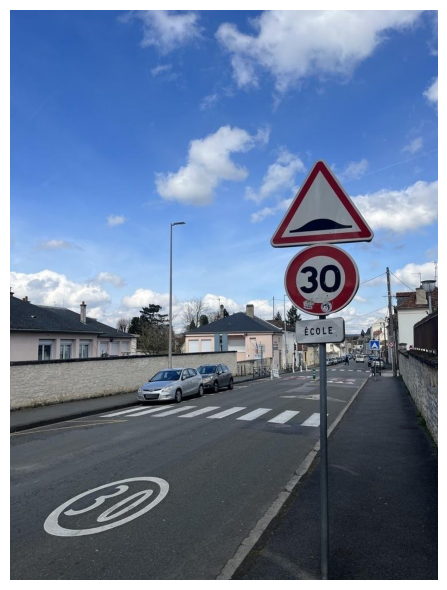

Cette image contient à priori ce panneau : danger à 99.62%
Détails des détections :
danger à 99.62%
interdiction à 99.62%
fvert à 65.46%
Détection terminée
Détection terminée pour la deuxième méthode
Panneau: danger, Confiance: 99.62%, Coordonnées: (460, 265), (633, 410)
Panneau: interdiction, Confiance: 99.62%, Coordonnées: (542, 447), (580, 496)
Voici les prédictions finales ['Panneau: danger, Confiance: 99.05%, Coordonnées: (432, 216), (648, 432)', 'Panneau: interdiction, Confiance: 74.13%, Coordonnées: (448, 384), (512, 448)', 'Panneau: danger, Confiance: 94.70%, Coordonnées: (480, 288), (576, 384)', 'Panneau: danger, Confiance: 83.25%, Coordonnées: (576, 576), (720, 720)', 'Panneau: frouge, Confiance: 80.50%, Coordonnées: (192, 576), (288, 672)', 'Panneau: frouge, Confiance: 72.98%, Coordonnées: (288, 576), (384, 672)', 'Panneau: danger, Confiance: 99.62%, Coordonnées: (460, 265), (633, 410)', 'Panneau: interdiction, Confiance: 99.62%, Coordonnées: (542, 447), (580, 496)']


In [69]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from collections import defaultdict
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from skimage import io, color, measure, filters, morphology, feature
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à 100x100 pour correspondre au modèle entraîné
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1] + 1, step_size):
        for x in range(0, image.width - window_size[0] + 1, step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection pour une seule fenêtre
def detect_single_window(image, box, clf, label_encoder, confidence_threshold):
    hog_features = prepare_data(image, box)
    probabilities = clf.predict_proba([hog_features])[0]
    max_proba = np.max(probabilities)
    if max_proba >= confidence_threshold:
        prediction = np.argmax(probabilities)
        predicted_label = label_encoder.inverse_transform([prediction])[0]
        if predicted_label != 'empty':
            return max_proba, predicted_label, box
    return None

# Fonction de détection avec une fenêtre de taille fixe
def detect_with_fixed_window(image, win_size, step_size, confidence_threshold, clf, label_encoder):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5, max_layer=4)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
        print(f"Taille de l'image à l'échelle {1.5 ** i}: {resized_image.width}x{resized_image.height}")
        # Parcourir l'image avec la fenêtre glissante
        boxes = list(sliding_window(resized_image, step_size, win_size))
        results = Parallel(n_jobs=-1)(delayed(detect_single_window)(resized_image, box, clf, label_encoder, confidence_threshold) for box in boxes)
        results = [r for r in results if r is not None]

        for max_proba, predicted_label, (x1, y1, x2, y2) in results:
            # Ajuster les coordonnées à l'échelle originale
            scale_factor = 1.5 ** i
            original_x1 = int(x1 * scale_factor)
            original_y1 = int(y1 * scale_factor)
            original_x2 = int(x2 * scale_factor)
            original_y2 = int(y2 * scale_factor)

            # Stocker la détection
            detections.append((max_proba, predicted_label, original_x1, original_y1, original_x2, original_y2))
    
    return detections

def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si une boîte englobante en englobe une autre
def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si deux boîtes englobantes sont trop proches
def are_boxes_too_close(box1, box2, threshold=10):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return abs(x1_1 - x1_2) < threshold and abs(y1_1 - y1_2) < threshold and \
           abs(x2_1 - x2_2) < threshold and abs(y2_1 - y2_2) < threshold

# Fonction principale pour détecter les panneaux dans une image
def detect_signs_in_image(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')

    # Détection avec des carrés 64x64
    detections_64x64 = detect_with_fixed_window(image, (64, 64), 64, confidence_threshold, clf, label_encoder)

    # Stocker les résultats
    bboxes = []
    bboxes_confidences = defaultdict(list)

    for max_proba, predicted_label, x1, y1, x2, y2 in detections_64x64:
        bboxes.append(((x1, y1, x2, y2), predicted_label))
        bboxes_confidences[(x1, y1, x2, y2)].append(max_proba)
    
    # Filtrer les détections avec une confiance supérieure à 65%
    filtered_bboxes = [(bbox, label) for bbox, label in bboxes if max(bboxes_confidences[bbox]) >= 0.65]

    # Filtrer les détections conflictuelles pour les feux de signalisation
    traffic_light_detections = []
    final_bboxes = []
    for bbox, label in filtered_bboxes:
        if label in ['frouge', 'forange', 'fvert']:
            traffic_light_detections.append((bbox, label, max(bboxes_confidences[bbox])))
        else:
            final_bboxes.append((bbox, label))

    if traffic_light_detections:
        # Trouver le type de feu de signalisation avec la plus grande confiance
        best_traffic_light_type = max(traffic_light_detections, key=lambda x: x[2])[1]
        # Conserver seulement les détections de ce type
        filtered_traffic_lights = [detection for detection in traffic_light_detections if detection[1] == best_traffic_light_type]
        for bbox, label, confidence in filtered_traffic_lights:
            final_bboxes.append((bbox, label))

    # Éliminer les boîtes englobantes trop proches ou englobées
    final_bboxes_filtered = []

    for bbox, label in final_bboxes:
        if not any(does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox) for existing_bbox, existing_label in final_bboxes_filtered if existing_label == label):
            final_bboxes_filtered.append((bbox, label))
        else:
            # Trouver et comparer les confiances
            for i, (existing_bbox, existing_label) in enumerate(final_bboxes_filtered):
                if existing_label == label and (does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox)):
                    if max(bboxes_confidences[bbox]) > max(bboxes_confidences[existing_bbox]):
                        final_bboxes_filtered[i] = (bbox, label)
                    break
    
    final_bboxes = final_bboxes_filtered

    # Trouver la boîte avec la plus grande valeur de prédiction
    if final_bboxes:
        best_bbox = max(bboxes_confidences.items(), key=lambda item: max(item[1]))
        best_label = [label for bbox, label in final_bboxes if bbox == best_bbox[0]][0]
        result_phrase = f"L'image contient à priori le panneau {best_label} avec la plus grande valeur de confiance ({max(best_bbox[1]):.2f})."
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."

    predicted_signs = list(set([label for _, label in final_bboxes]))

    print(result_phrase)
    return predicted_signs, final_bboxes, bboxes_confidences, result_phrase

# Fonction pour générer des phrases de résultat
def generate_result_phrases(final_bboxes, bboxes_confidences):
    result_phrases = []
    for bbox, label in final_bboxes:
        confidences = bboxes_confidences[bbox]
        max_confidence = max(confidences) * 100  # Convertir en pourcentage
        x1, y1, x2, y2 = bbox
        phrase = f"Panneau: {label}, Confiance: {max_confidence:.2f}%, Coordonnées: ({x1}, {y1}), ({x2}, {y2})"
        result_phrases.append(phrase)
    return result_phrases

# Deuxième méthode
def detect_and_display_shapes(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = io.imread(image_path)
    image_pil = Image.fromarray(image)
    image_gray = color.rgb2gray(image)

    # Appliquer un seuillage pour binariser l'image
    thresh = filters.threshold_otsu(image_gray)
    bw = morphology.closing(image_gray > thresh, morphology.square(3))

    # Enlever les objets connectés au bord de l'image
    cleared = morphology.remove_small_objects(bw, 20)
    cleared = morphology.remove_small_holes(cleared, 20)

    # Utiliser la détection de contours pour améliorer la détection des formes
    edges = feature.canny(image_gray, sigma=2.0)
    filled_edges = morphology.binary_closing(edges, morphology.square(3))
    label_image = measure.label(filled_edges)

    # Détecter les propriétés des régions
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image)

    all_detections = []

    for region in measure.regionprops(label_image):
        # Sauter les petites régions
        if region.area < 100:
            continue

        # Détecter la boîte englobante
        minr, minc, maxr, maxc = region.bbox
        rect_height = maxr - minr
        rect_width = maxc - minc

        # Préparer les données pour la classification
        box = (minc, minr, maxc, maxr)
        hog_features = prepare_data(image_pil, box)
        probabilities = clf.predict_proba([hog_features])[0]
        max_proba = np.max(probabilities)

        if max_proba >= confidence_threshold:
            prediction = np.argmax(probabilities)
            predicted_label = label_encoder.inverse_transform([prediction])[0]
            if predicted_label != 'empty':
                all_detections.append((max_proba, predicted_label, minc, minr, maxc, maxr))

    # Filtrer les boîtes englobantes qui sont complètement contenues dans d'autres
    filtered_detections = []
    for i, det1 in enumerate(all_detections):
        contained = False
        for j, det2 in enumerate(all_detections):
            if i != j and is_contained(det1[2:], det2[2:]):
                contained = True
                if det1[0] > det2[0]:  # Si la boîte intérieure a une meilleure précision, remplacer
                    if det2 in filtered_detections:
                        filtered_detections.remove(det2)
                    filtered_detections.append(det1)
                break
        if not contained:
            filtered_detections.append(det1)

    # Sélectionner une seule boîte parmi les boîtes proches
    selected_detections = []
    while filtered_detections:
        det = filtered_detections.pop(0)
        proba, label, minc, minr, maxc, maxr = det
        close_detections = [d for d in filtered_detections if (abs(d[2] - minc) < 20 and abs(d[3] - minr) < 20) or (abs(d[4] - maxc) < 20 and abs(d[5] - maxr) < 20)]
        for close_det in close_detections:
            if close_det in filtered_detections:
                filtered_detections.remove(close_det)
            if close_det[0] > proba:
                det = close_det
        selected_detections.append(det)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

    # Préparer les résultats avec les pourcentages de confiance les plus élevés
    detections_summary = {}
    for detection in selected_detections:
        proba, label, x1, y1, x2, y2 = detection
        if label not in detections_summary or proba > detections_summary[label]:
            detections_summary[label] = proba

    # Trier les détections par confiance décroissante
    sorted_detections = sorted(detections_summary.items(), key=lambda x: x[1], reverse=True)

    # Afficher le panneau avec le pourcentage le plus élevé
    if sorted_detections:
        best_label, best_proba = sorted_detections[0]
        result_phrase = f"Cette image contient à priori ce panneau : {best_label} à {best_proba * 100:.2f}%"
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."

    print(result_phrase)
    print("Détails des détections :")
    for label, proba in sorted_detections:
        print(f"{label} à {proba * 100:.2f}%")

    print("Détection terminée")
    return result_phrase, selected_detections
Total = []
# Fonction principale pour exécuter les deux méthodes et afficher les résultats
def main(image_path, clf, label_encoder):
    # Exécution de la première méthode
    print("Exécution de la première méthode...")
    predicted_signs, final_bboxes, bboxes_confidences, result_phrase = detect_signs_in_image(image_path, clf, label_encoder)
    print("Détection terminée pour la première méthode")
    result_phrases = generate_result_phrases(final_bboxes, bboxes_confidences)
    for phrase in result_phrases:
        print(phrase)
        Total.append(phrase)
    
    # Exécution de la deuxième méthode
    print("\nExécution de la deuxième méthode...")
    result_phrase, detections = detect_and_display_shapes(image_path, clf, label_encoder)
    bounding_boxes = get_detected_sign_bounding_boxes(detections)
    
    # Suppression des boîtes englobantes très proches en gardant la meilleure précision
    filtered_bounding_boxes = bounding_boxes[:]
    i = 0
    while i < len(filtered_bounding_boxes):
        bbox1 = filtered_bounding_boxes[i]
        j = i + 1
        while j < len(filtered_bounding_boxes):
            bbox2 = filtered_bounding_boxes[j]
            if is_close(bbox1, bbox2):
                # Garder celui avec la meilleure précision
                if bbox1[-1] >= bbox2[-1]:
                    filtered_bounding_boxes.pop(j)
                else:
                    filtered_bounding_boxes.pop(i)
                    i -= 1
                    break
            else:
                j += 1
        i += 1

    # Affichage des boîtes englobantes filtrées
    print("Détection terminée pour la deuxième méthode")
    for bbox in filtered_bounding_boxes:
        label, x1, y1, x2, y2, proba = bbox
        print(f"Panneau: {label}, Confiance: {proba*100:.2f}%, Coordonnées: ({x1}, {y1}), ({x2}, {y2})")
        Total.append(f"Panneau: {label}, Confiance: {proba*100:.2f}%, Coordonnées: ({x1}, {y1}), ({x2}, {y2})")

# Exemple d'utilisation
# Assurez-vous que `clf` et `label_encoder` sont déjà entraînés et disponibles
# clf = <votre modèle entraîné>
# label_encoder = <votre label encoder>

image_path = 'train/images/0317.jpg'
main(image_path, clf, label_encoder)
print(f"Voici les prédictions finales {Total}")

In [71]:
predictions = Total
def parse_coordinates(coord_string):
    coords = coord_string.replace('Coordonnées: ', '').replace('(', '').replace(')', '').split(', ')
    coords = tuple(map(int, filter(lambda x: x != '', coords)))
    return coords

# Analyser les prédictions
parsed_predictions = []
for prediction in predictions:
    parts = prediction.split(', ')
    label = parts[0]
    confidence = float(parts[1].replace('Confiance: ', '').replace('%', ''))

    coordinates = parse_coordinates(parts[2])

    parsed_predictions.append((label, confidence, coordinates))

# Trier par confiance décroissante
sorted_predictions = sorted(parsed_predictions, key=lambda x: x[1], reverse=True)

# Supprimer les doublons et les prédictions avec une confiance inférieure
final_predictions = []
for prediction in sorted_predictions:
    is_duplicate = False
    for existing_prediction in final_predictions:
        # Vérifier si les coordonnées sont trop proches
        if abs(prediction[2][0] - existing_prediction[2][0]) < 20:
            is_duplicate = True
            break
    if not is_duplicate:
        final_predictions.append(prediction)

# Afficher les prédictions finales
for prediction in final_predictions:
    print(f"{prediction[0]}, Confiance: {prediction[1]:.2f}%, Coordonnées: {prediction[2]}")

Panneau: danger, Confiance: 99.62%, Coordonnées: (460,)
Panneau: interdiction, Confiance: 99.62%, Coordonnées: (542,)
Panneau: danger, Confiance: 99.05%, Coordonnées: (432,)
Panneau: danger, Confiance: 94.70%, Coordonnées: (480,)
Panneau: danger, Confiance: 83.25%, Coordonnées: (576,)
Panneau: frouge, Confiance: 80.50%, Coordonnées: (192,)
Panneau: frouge, Confiance: 72.98%, Coordonnées: (288,)
